In [103]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
%autoreload 2

In [106]:
import mushroom.data.cosmx as cosmx
import mushroom.data.xenium as xenium
import mushroom.registration.bigwarp as bigwarp

In [108]:
scale = .2

In [107]:
filepath = '/diskmnt/primary/Xenium_primary/data/20240116__200025__24019/output-XETG00122__0010369__HT413C1-Th1K4A1Us1_19__20240116__200059'
adata = xenium.adata_from_xenium(filepath)
adata

/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


AnnData object with n_obs × n_vars = 102724 × 477
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'ppm'
    obsm: 'spatial'

In [ ]:
ddf_fp = '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT413C1-Th1k4A1/registration/s2_'

ddf = bigwarp.read_bigwarp_warp_field(ddf_fp, scale) # ddfs are (c h w)
ddf.shape

In [131]:
filepath = '/diskmnt/Projects/Users/estorrs/imaging-analysis/data/htan_talk/cosmx/HT413C1-Th1K4A1Us7_1.h5ad'

In [132]:
adata = cosmx.adata_from_cosmx(filepath)
adata

AnnData object with n_obs × n_vars = 73874 × 1000
    obs: 'nn_fe6192eb.42e5.4fe7.bb87.3f135ac419e1_1_cluster_cluster_0e369590.6582.4f98.888c.31c1e1e79bd2_1', 'nCount_RNA', 'nFeature_RNA', 'nCount_negprobes', 'nFeature_negprobes', 'nn_62902f34.ea2c.4493.a837.18d22e3fcf4e_1_cluster_cluster_1d82bfd6.0c18.43d8.9333.c51e3a80d0bc_1', 'RNA_nbclust_099edabb.2194.47e8.ac53.3b0bba1aff79_1_clusters', 'RNA_nbclust_099edabb.2194.47e8.ac53.3b0bba1aff79_1_posterior_probability', 'fov', 'Area', 'AspectRatio', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68', 'Max.CD68', 'Mean.Membrane', 'Max.Membrane', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'assay_type', 'version', 'Run_Tissue_name', 'Panel', 'slide_ID', 'cell_ID', 'unassignedTranscripts', 'nCount_falsecode', 'nFeature_falsecode', 'Area.um2', 'CenterX_local_px', 'CenterY_local_px', 'CenterX_global_px', 'CenterY_global_px', 'propNegative', 'complexity', 'errorCtEstimate', 'percOfDataFromError', 'qcFlagsRNACounts', 'qcFla

In [133]:
scale = .2

In [134]:
ddf_fp = '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT413C1-Th1k4A1/registration/s8_HT413C1-Th1k4A1-U7_ddf.tif'

ddf = bigwarp.read_bigwarp_warp_field(ddf_fp, scale) # ddfs are (c h w)
ddf.shape

torch.Size([2, 5085, 3640])

In [73]:
ddf[0]

tensor([[39186.7930, 39186.7930, 39186.7930,  ..., 37324.2148, 37324.2148,
         37324.2148],
        [39186.7930, 39186.7930, 39186.7930,  ..., 37324.2148, 37324.2148,
         37324.2148],
        [39186.7930, 39186.7930, 39186.7930,  ..., 37324.2148, 37324.2148,
         37324.2148],
        ...,
        [-8194.2783, -8194.2783, -8194.2783,  ..., -9653.2598, -9653.2598,
         -9653.2598],
        [-8194.2783, -8194.2783, -8194.2783,  ..., -9653.2598, -9653.2598,
         -9653.2598],
        [-8194.2783, -8194.2783, -8194.2783,  ..., -9653.2598, -9653.2598,
         -9653.2598]])

In [74]:
adata.obsm['spatial']

array([[11315, 29445],
       [ 9388, 26254],
       [ 9565, 26224],
       ...,
       [26456,    23],
       [27902,    22],
       [26850,    20]])

In [75]:
ddf[:, 1000, 1000]

tensor([29415.9590, 21708.9824])

In [76]:
ddf.max()

tensor(39186.7930)

In [77]:
adata.obsm['spatial'].max(0)

array([29709, 29768])

In [78]:
next(iter(adata.uns['spatial'].values()))['images']['hires'].shape

(2979, 2979)

In [79]:
next(iter(adata.uns['spatial'].values()))['scalefactors']

{'spot_diameter_fullres': 10.0,
 'tissue_hires_CD45_scalef': 0.1,
 'tissue_hires_CD68_scalef': 0.1,
 'tissue_hires_DNA_scalef': 0.1,
 'tissue_hires_Membrane_scalef': 0.1,
 'tissue_hires_PanCK_scalef': 0.1,
 'tissue_hires_scalef': 0.1}

In [135]:
res = 1.
a = adata.copy()
# a.obsm['spatial'] = (a.obsm['spatial'] * .1).astype(int)

adata2 = bigwarp.register_cosmx(
    a, ddf, resolution=res
)

/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [136]:
adata2

AnnData object with n_obs × n_vars = 73874 × 1000
    obs: 'nn_fe6192eb.42e5.4fe7.bb87.3f135ac419e1_1_cluster_cluster_0e369590.6582.4f98.888c.31c1e1e79bd2_1', 'nCount_RNA', 'nFeature_RNA', 'nCount_negprobes', 'nFeature_negprobes', 'nn_62902f34.ea2c.4493.a837.18d22e3fcf4e_1_cluster_cluster_1d82bfd6.0c18.43d8.9333.c51e3a80d0bc_1', 'RNA_nbclust_099edabb.2194.47e8.ac53.3b0bba1aff79_1_clusters', 'RNA_nbclust_099edabb.2194.47e8.ac53.3b0bba1aff79_1_posterior_probability', 'fov', 'Area', 'AspectRatio', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68', 'Max.CD68', 'Mean.Membrane', 'Max.Membrane', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'assay_type', 'version', 'Run_Tissue_name', 'Panel', 'slide_ID', 'cell_ID', 'unassignedTranscripts', 'nCount_falsecode', 'nFeature_falsecode', 'Area.um2', 'CenterX_local_px', 'CenterY_local_px', 'CenterX_global_px', 'CenterY_global_px', 'propNegative', 'complexity', 'errorCtEstimate', 'percOfDataFromError', 'qcFlagsRNACounts', 'qcFla

In [113]:
import torch
import scipy.ndimage as ndi

In [114]:
ddf = bigwarp.read_bigwarp_warp_field(ddf_fp, .2)
# ddf *= .1

In [115]:
ddf.shape

torch.Size([2, 5085, 3640])

In [84]:
import tifffile
tifffile.imwrite('/diskmnt/Projects/Users/estorrs/ddf.tif', ddf.numpy())

In [116]:
pts = adata.obsm['spatial'][:, [1, 0]]
pts.shape

(73874, 2)

In [117]:
if not isinstance(pts, torch.Tensor):
    pts = torch.tensor(pts)
pts = pts.to(torch.long)
print(pts.shape)

torch.Size([73874, 2])


In [126]:
# import numpy as np
max_r, max_c = pts.max(dim=0).values
img = torch.zeros((max_r + 1, max_c + 1), dtype=torch.long)
for i, (r, c) in enumerate(pts):
    r1, r2 = max(0, r - 10), min(max_r + 1, r + 10)
    c1, c2 = max(0, c - 10), min(max_c + 1, c + 10)
    img[r1:r2, c1:c2] = i + 1

img.shape

torch.Size([29769, 29710])

In [127]:
# import skimage
# expanded = skimage.segmentation.expand_labels(img, distance=10)
# expanded.shape

In [88]:
tifffile.imwrite('/diskmnt/Projects/Users/estorrs/img.tif', img.numpy())

In [66]:
# import tifffile
# tiff

In [128]:
img.unique()

tensor([    0,     1,     2,  ..., 73872, 73873, 73874])

In [57]:
img[11000:11100, 11000:11100]

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

In [96]:
ddf.shape, ddf.max()

(torch.Size([2, 5085, 3640]), tensor(3918.6794))

In [97]:
ddf

tensor([[[3918.6794, 3918.6794, 3918.6794,  ..., 3732.4216, 3732.4216,
          3732.4216],
         [3918.6794, 3918.6794, 3918.6794,  ..., 3732.4216, 3732.4216,
          3732.4216],
         [3918.6794, 3918.6794, 3918.6794,  ..., 3732.4216, 3732.4216,
          3732.4216],
         ...,
         [-819.4279, -819.4279, -819.4279,  ..., -965.3260, -965.3260,
          -965.3260],
         [-819.4279, -819.4279, -819.4279,  ..., -965.3260, -965.3260,
          -965.3260],
         [-819.4279, -819.4279, -819.4279,  ..., -965.3260, -965.3260,
          -965.3260]],

        [[3061.8640, 3061.8640, 3061.8640,  ..., -305.4651, -305.4651,
          -305.4651],
         [3061.8640, 3061.8640, 3061.8640,  ..., -305.4651, -305.4651,
          -305.4651],
         [3061.8640, 3061.8640, 3061.8640,  ..., -305.4651, -305.4651,
          -305.4651],
         ...,
         [3205.5193, 3205.5193, 3205.5193,  ..., -117.8580, -117.8580,
          -117.8580],
         [3205.5193, 3205.5193, 3205.519

In [129]:
warped = bigwarp.warp_image(img, ddf)
warped.shape

torch.Size([5085, 3640])

In [130]:
len(warped.unique())

73875

In [90]:
tifffile.imwrite('/diskmnt/Projects/Users/estorrs/warped.tif', warped.numpy())

In [55]:
warped[1000:1100, 1000:1100]

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

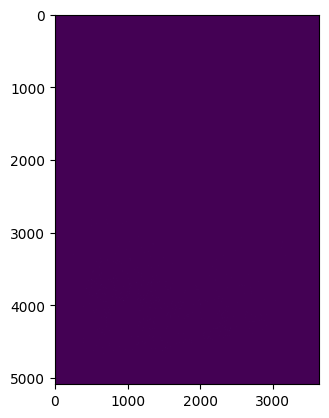

In [54]:
plt.imshow(warped)

In [53]:
warped[:100, :100]

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

In [52]:
len(warped.unique())

4344

In [44]:
objects = ndi.find_objects(img.numpy())
print(len(objects))

73848


In [45]:
objects[:10]

[(slice(19079, 19080, None), slice(18020, 18021, None)),
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [44]:
adata2.obsm['spatial']

array([[2363, 1453],
       [2649, 1417],
       [2608, 1420],
       ...,
       [ 750, 4559],
       [ 599, 4589],
       [ 481, 4611]])

(19.299999999999983, 3664.7, 4863.75, 843.25)

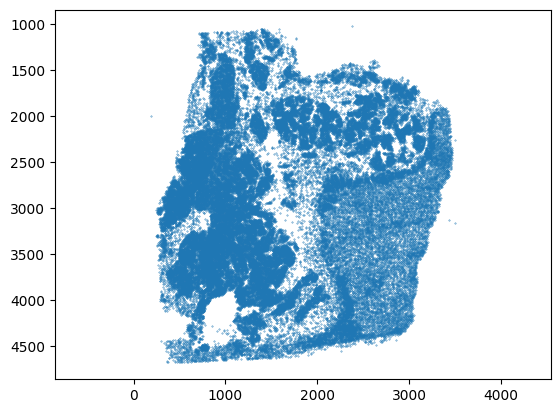

In [138]:
plt.scatter(adata2.obsm['spatial'][:, 0], adata2.obsm['spatial'][:, 1], s=.1)
plt.gca().invert_yaxis()
plt.axis('equal')

(1097.55, 31071.45, -1469.5, 31255.5)

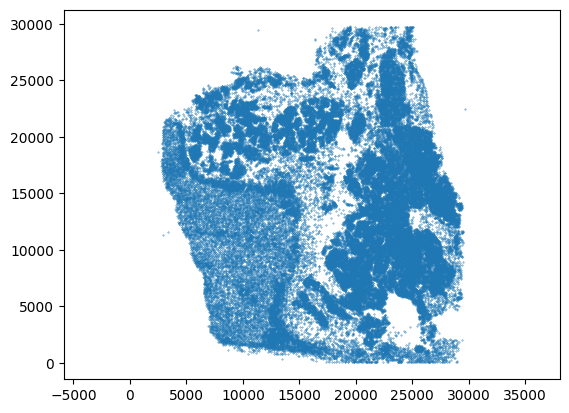

In [46]:
plt.scatter(adata.obsm['spatial'][:, 0], adata.obsm['spatial'][:, 1], s=.1)
plt.axis('equal')